In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [60]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [61]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [63]:
df.duplicated().sum()

0

In [64]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [65]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [66]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [67]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [70]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [71]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
X.shape

(10000, 11)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [78]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5202 - accuracy: 0.7875 - val_loss: 0.4609 - val_accuracy: 0.8062
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7912 - val_loss: 0.4307 - val_accuracy: 0.8206
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.8037 - val_loss: 0.4127 - val_accuracy: 0.8288
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8170 - val_loss: 0.4029 - val_accuracy: 0.8281
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.8256 - val_loss: 0.3982 - val_accuracy: 0.8300
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8336 - val_loss: 0.3829 - val_accuracy: 0.8375
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8420 - val_loss: 0.3713 - val_accuracy: 0.8475

In [79]:
model.layers[0].get_weights()

[array([[-0.03046354,  0.19068119, -0.20618643, -0.3838109 , -0.20246948,
          0.47418317, -0.24729067, -0.0293798 ,  0.00301161,  0.03816903,
         -0.05577265],
        [ 0.8547141 , -0.2647978 , -0.30279565, -0.405921  ,  0.15610503,
         -0.35779294, -0.01221774, -0.26520544, -0.38224423,  0.3262131 ,
          1.3961941 ],
        [ 0.05965264,  0.13515426,  0.13457476, -0.1257377 , -0.21437864,
         -0.25759295,  0.00160455,  0.00647916, -0.27269173, -0.03597992,
         -0.03253016],
        [ 0.00527919, -0.58370525, -0.25204057, -0.85663664,  0.49333513,
         -0.19749138,  0.77941763,  0.25855246, -0.08807013, -0.21177354,
         -0.25579163],
        [ 0.5111158 , -0.20725755,  0.116677  , -0.8271781 ,  0.41003236,
         -0.4651429 ,  0.51818955,  1.0367442 , -0.21899728,  1.322093  ,
         -0.5407212 ],
        [ 0.14194165, -0.00749171,  0.08419272, -0.29986116, -0.09180409,
          0.4463341 , -0.2671551 ,  0.301772  , -0.5308815 , -0.1714745

In [80]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [81]:
Y_pred = np.where(y_log>0.5,1,0)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8615

In [83]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.5202289819717407,
  0.4638095498085022,
  0.44182175397872925,
  0.42875370383262634,
  0.4172159433364868,
  0.4054068326950073,
  0.3914448022842407,
  0.3777891993522644,
  0.36589041352272034,
  0.35658249258995056,
  0.3491964042186737,
  0.3438492715358734,
  0.3408758044242859,
  0.33813154697418213,
  0.33665236830711365,
  0.335270494222641,
  0.3336165249347687,
  0.33308327198028564,
  0.3319227695465088,
  0.33103665709495544,
  0.3303510546684265,
  0.3302716314792633,
  0.32943129539489746,
  0.32880932092666626,
  0.32804328203201294,
  0.327726811170578,
  0.3270913064479828,
  0.3264913558959961,
  0.3265187442302704,
  0.3257593512535095,
  0.3250839114189148,
  0.3250444531440735,
  0.32452720403671265,
  0.32439833879470825,
  0.3238905370235443,
  0.3236188590526581,
  0.3229048252105713,
  0.32258570194244385,
  0.3219163119792938,
  0.3225158751010895,
  0.32160231471061707,
  0.3218238055706024,
  0.32110661268234253,
  0.3209521472454071,
  0.321051

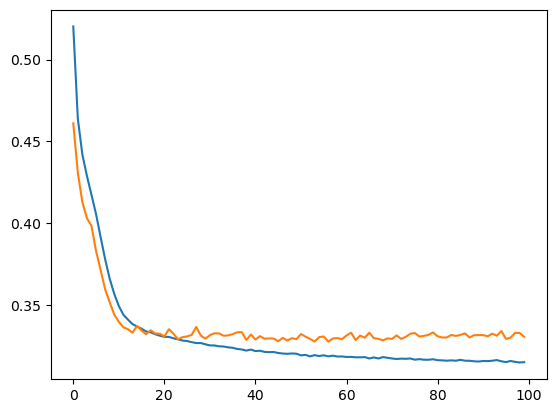

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

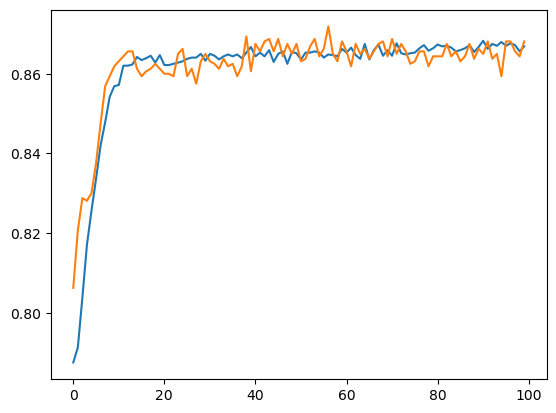

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])